## Project Name: Heart Attack Risk Predictor

### In this project we will Make an app which will help us predict the risk of a Heart Attack a person have.
### We will do use various Algorithms to predict the result and see which one suits best and then we will use Auto ML Library EVAL ML to predict the results.

In [1]:
# Heart Attack Risk Predictor - Clean Workflow
# This is a comprehensive pipeline for heart attack risk prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print("All necessary libraries imported successfully!")
print("="*50)

All necessary libraries imported successfully!


### We will do the following things:
- Data Analysis
- Feature Engineering
- Satandardization
- Model Building
- Predictions

### Let us import the necessary liabraries and read our DataSet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let us import our Data Set


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df= pd.read_csv("/content/drive/MyDrive/heart.csv")

In [5]:
df= df.drop(['oldpeak','slp','thall'],axis=1)

In [6]:
# 1. DATA LOADING AND INITIAL SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

print("Heart Attack Risk Predictor - Clean Streamlined Workflow")
print("=" * 60)

Heart Attack Risk Predictor - Clean Streamlined Workflow


### Data Analysis

### Understanding our DataSet:

#### Age : Age of the patient

#### Sex : Sex of the patient

#### exang: exercise induced angina (1 = yes; 0 = no)

#### ca: number of major vessels (0-3)

#### cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

#### trtbps : resting blood pressure (in mm Hg)

#### chol : cholestoral in mg/dl fetched via BMI sensor

#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### thalach : maximum heart rate achieved

#### target : 0= less chance of heart attack 1= more chance of heart attack

In [7]:
df.shape

(303, 11)

In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
caa,0


#### As we can see there are no null values in our Data Set

In [9]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

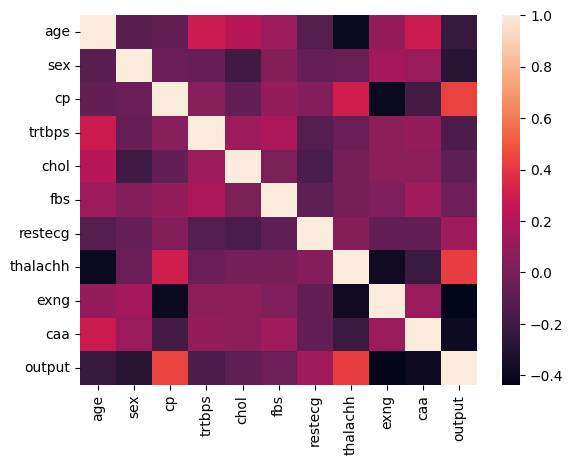

In [10]:
sns.heatmap(df.corr())

#### As we can see our variables are not highly correlated to each other

#### We will do Uni and Bi variate analysis on our Features

<Axes: title={'center': 'Age of Patients'}, xlabel='Age', ylabel='count'>

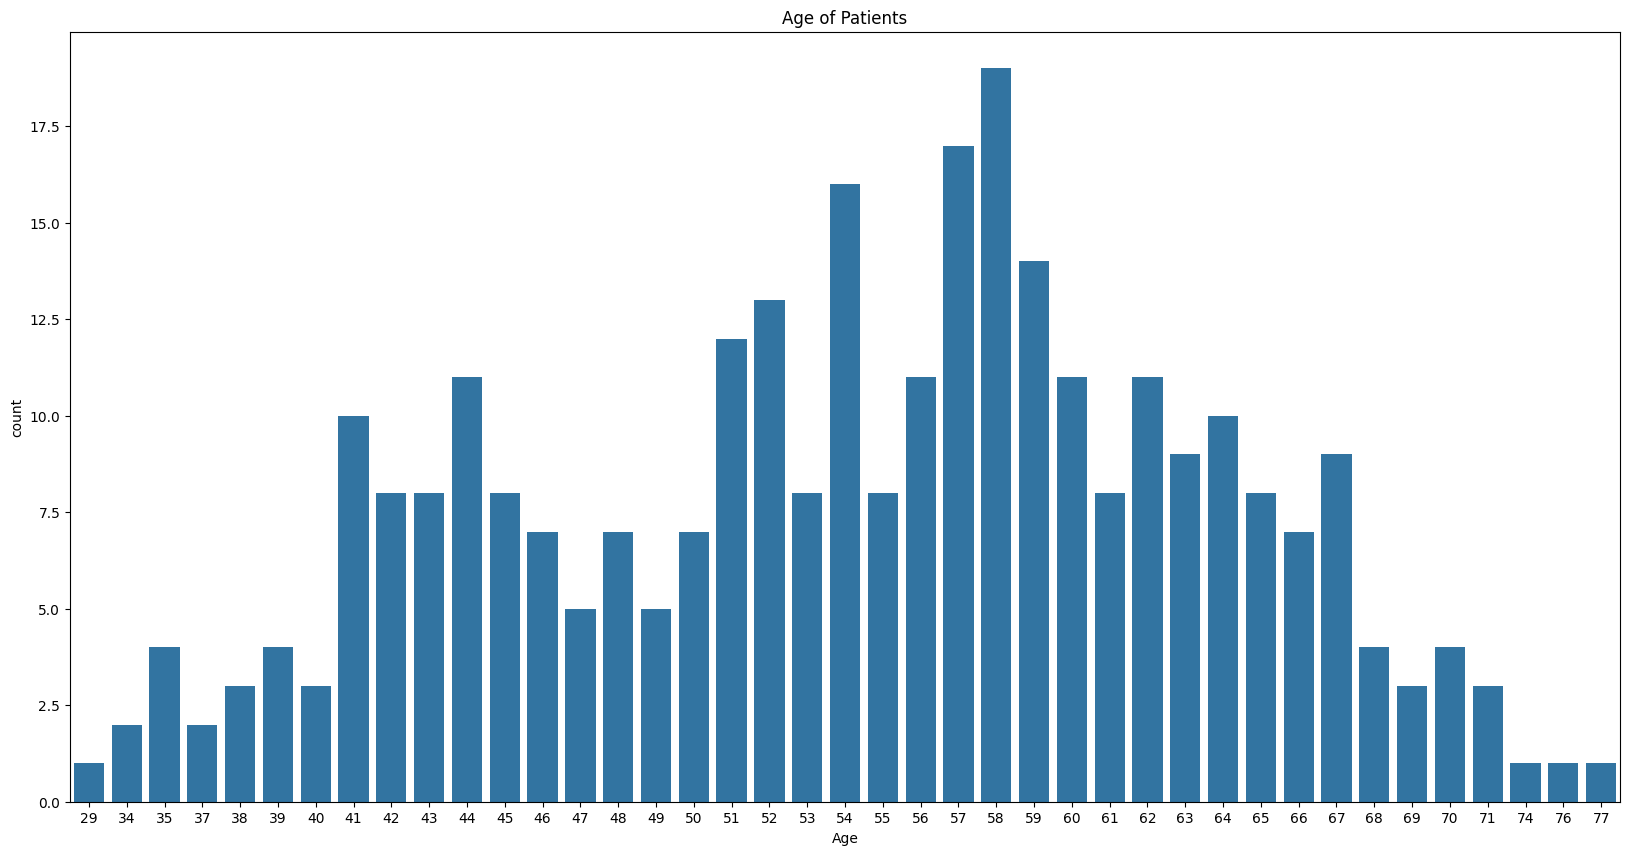

In [11]:

plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

#### As we can see the Patients are of Age Group 51-67years in majority

<Axes: title={'center': 'Sex of Patients,0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

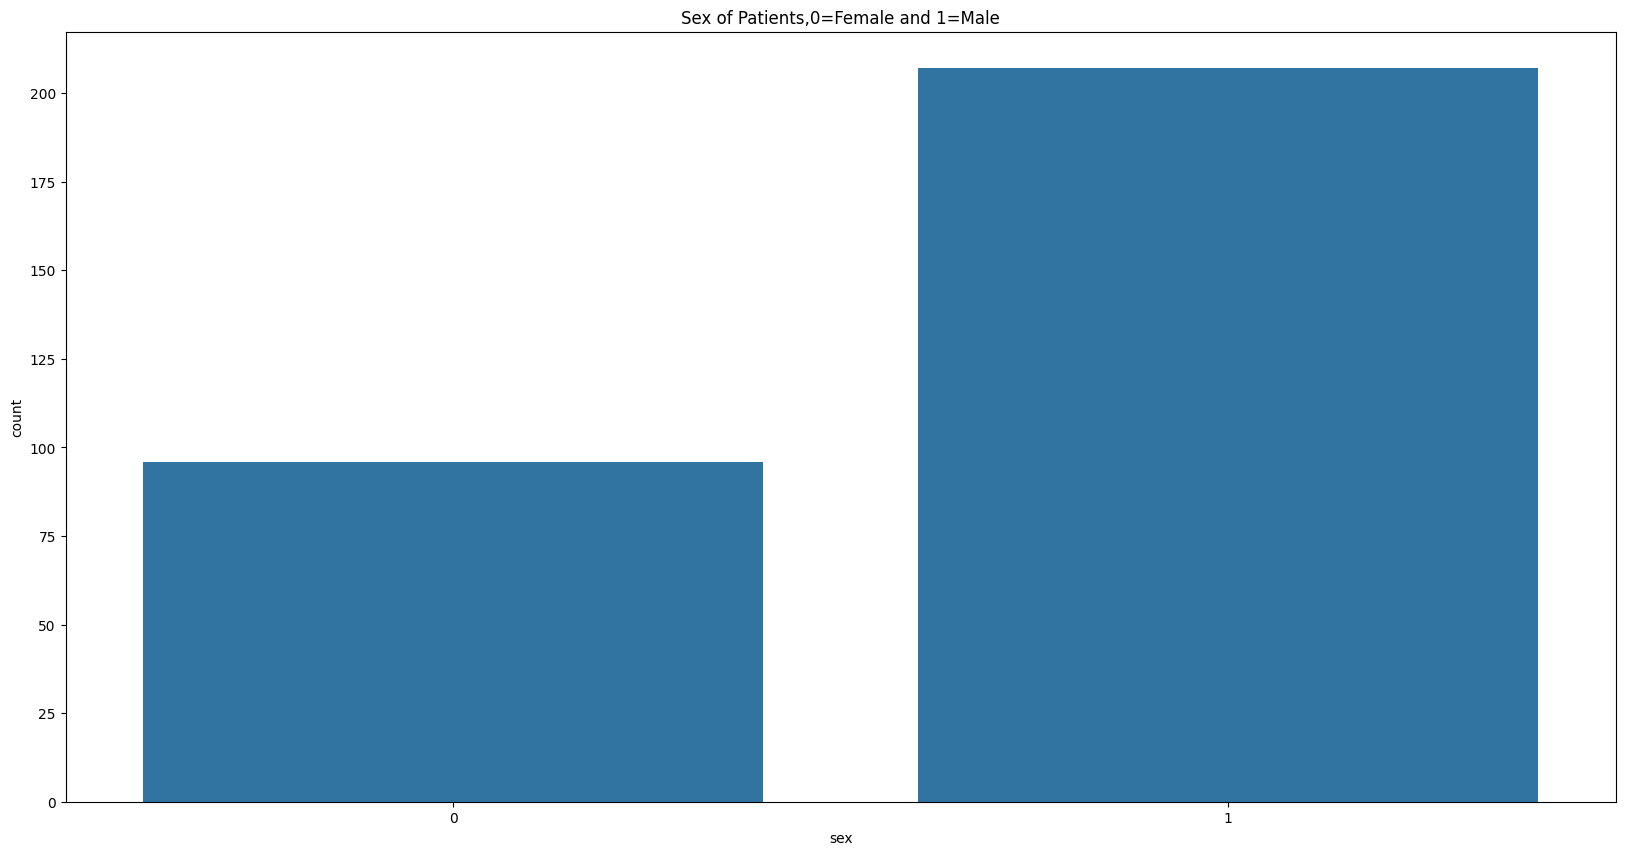

In [12]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df)

In [13]:
cp_data = df['cp'].value_counts().reset_index()
cp_data.columns = ['cp_code', 'count']  # Rename columns for clarity

# Map cp_code to meaningful labels
label_map = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-anginal Pain',
    3: 'Asymptomatic'
}

cp_data['cp_label'] = cp_data['cp_code'].map(label_map)

cp_data


,cp_code,count,cp_label
0,0,143,Typical Angina
1,2,87,Non-anginal Pain
2,1,50,Atypical Angina
3,3,23,Asymptomatic


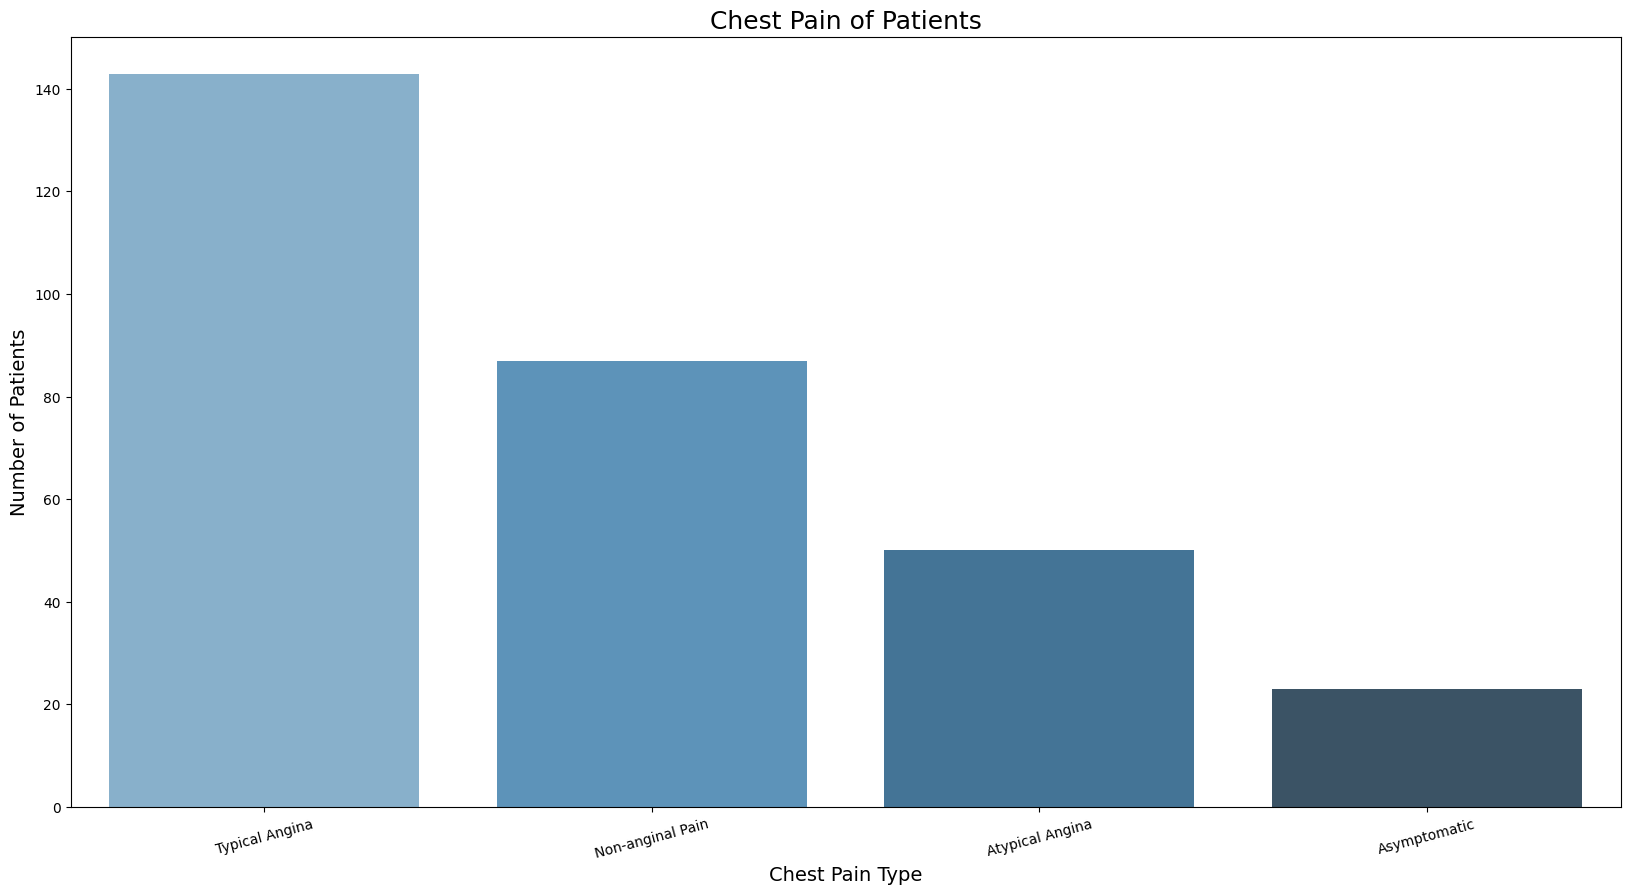

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients", fontsize=18)
sns.barplot(x=cp_data['cp_label'], y=cp_data['count'], palette="Blues_d")
plt.xlabel("Chest Pain Type", fontsize=14)
plt.ylabel("Number of Patients", fontsize=14)
plt.xticks(rotation=15)
plt.show()


#### We have seen how the the Chest Pain Category is distributed

In [15]:
# Count and reset index
ecg_data = df['restecg'].value_counts().reset_index()
ecg_data.columns = ['restecg_code', 'count']  # Rename columns

# Map readable labels
label_map = {
    0: 'Normal',
    1: 'ST-T wave abnormality',
    2: 'Left ventricular hypertrophy by Estes'
}
ecg_data['ecg_label'] = ecg_data['restecg_code'].map(label_map)

ecg_data


,restecg_code,count,ecg_label
0,1,152,ST-T wave abnormality
1,0,147,Normal
2,2,4,Left ventricular hypertrophy by Estes


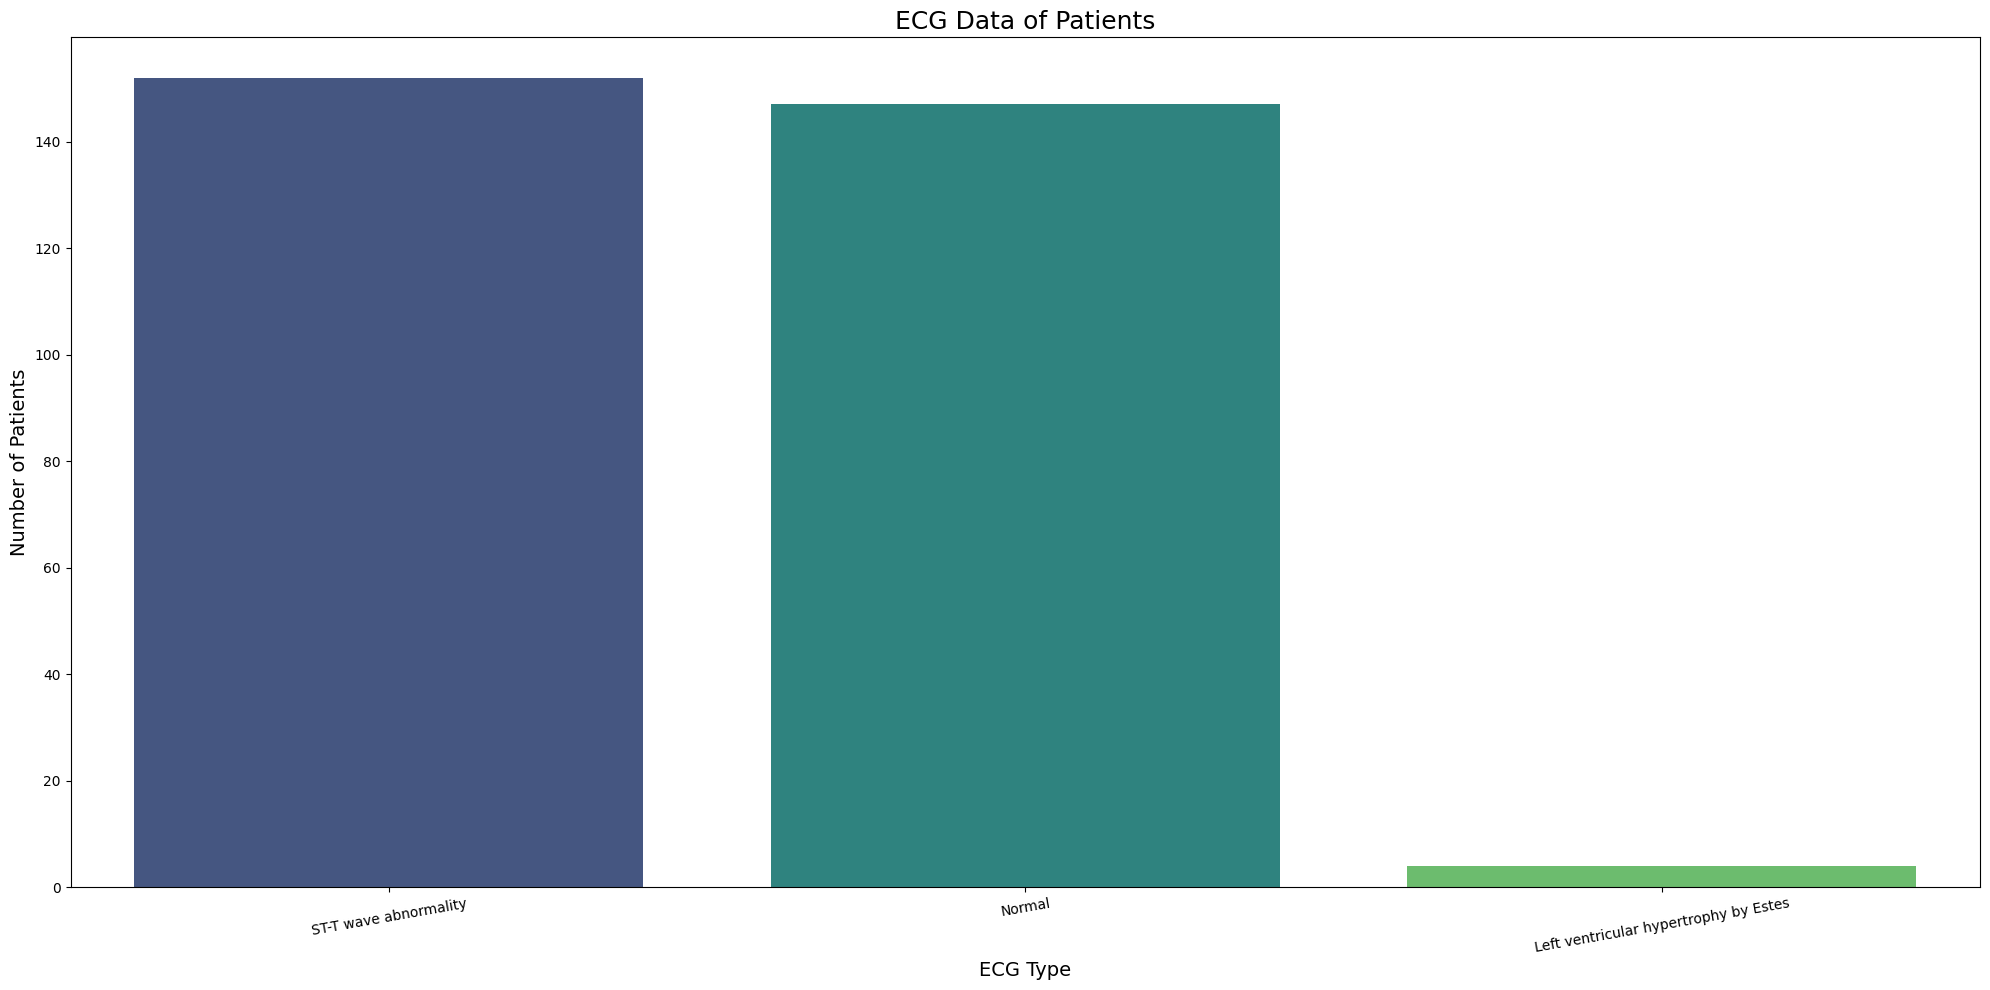

In [16]:
plt.figure(figsize=(20, 10))
plt.title("ECG Data of Patients", fontsize=18)

sns.barplot(
    x=ecg_data['ecg_label'],
    y=ecg_data['count'],
    hue=ecg_data['ecg_label'],     # assign x as hue to satisfy future requirements
    palette="viridis",
    legend=False                   # optional: hide repeated legend
)

plt.xlabel("ECG Type", fontsize=14)
plt.ylabel("Number of Patients", fontsize=14)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


#### This is our ECG Data

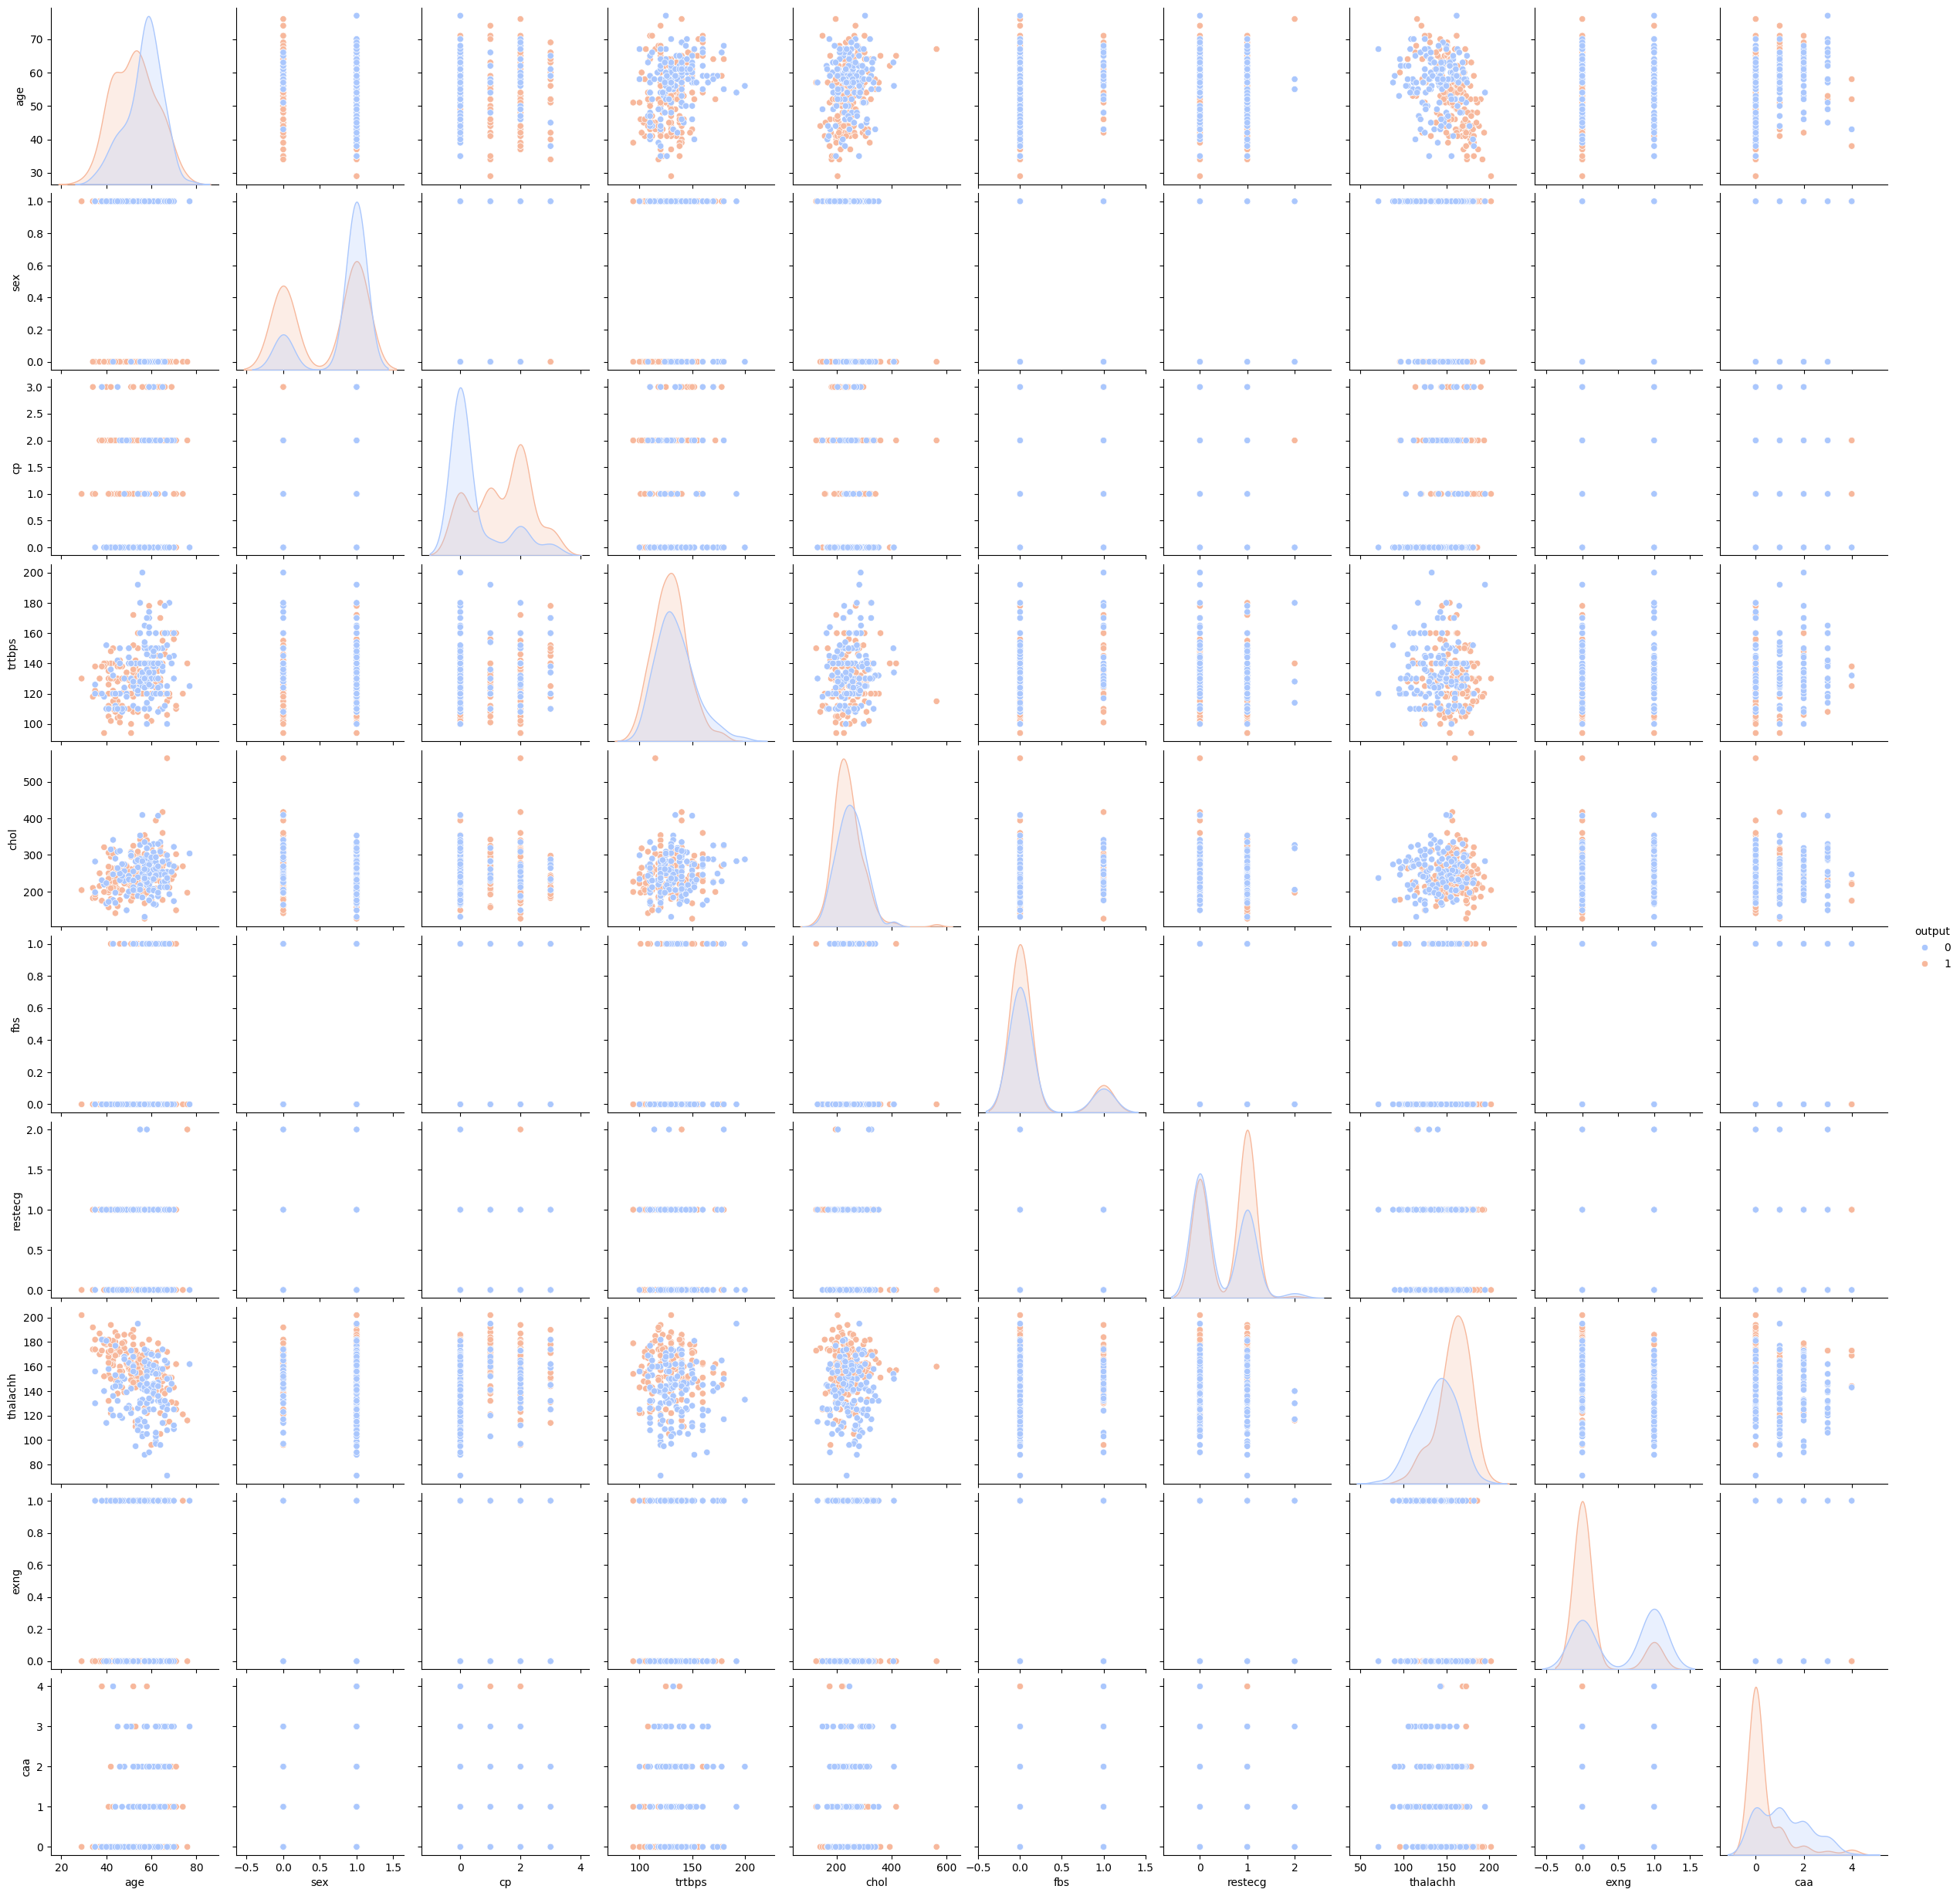

In [17]:
sns.pairplot(df, hue='output', diag_kind='kde', palette='coolwarm')


### Let us see for our Continuous Variable

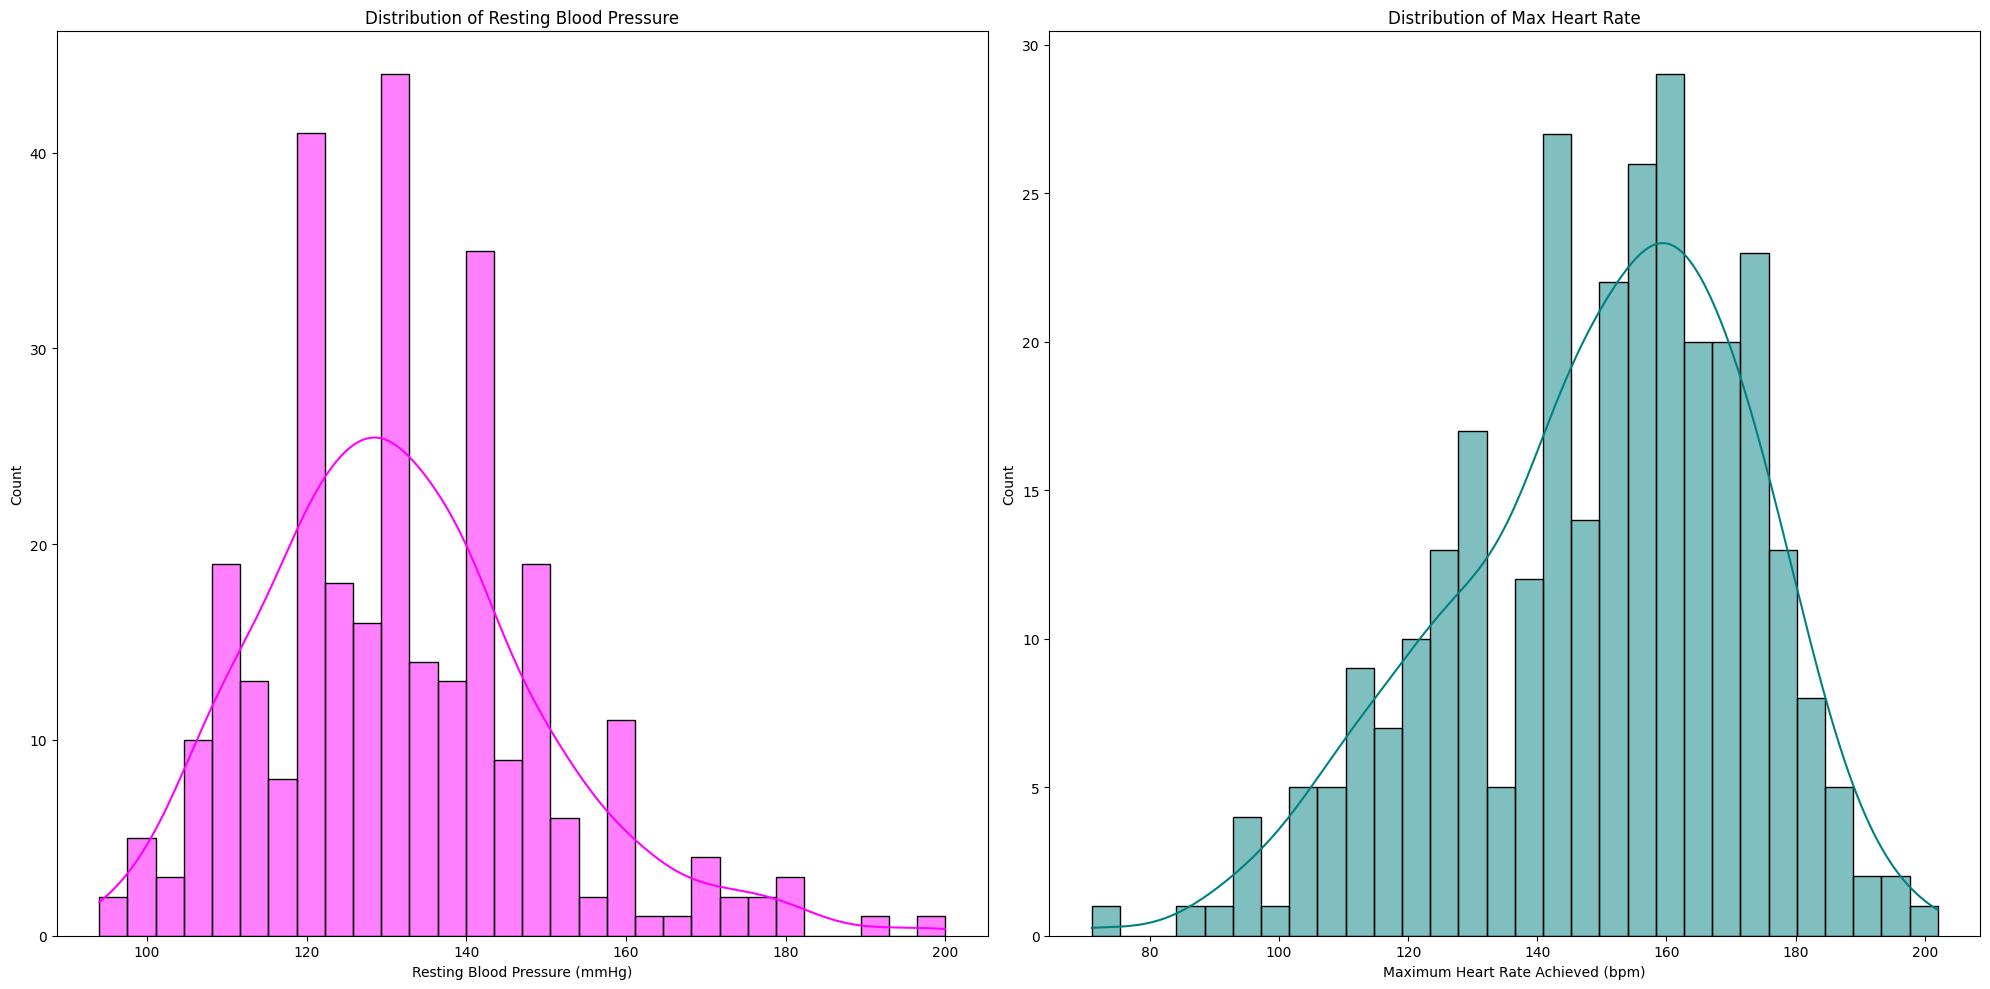

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

# First subplot: Resting Blood Pressure
plt.subplot(1, 2, 1)
sns.histplot(df['trtbps'], kde=True, color='magenta', bins=30)
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.title("Distribution of Resting Blood Pressure")

# Second subplot: Max Heart Rate
plt.subplot(1, 2, 2)
sns.histplot(df['thalachh'], kde=True, color='teal', bins=30)
plt.xlabel("Maximum Heart Rate Achieved (bpm)")
plt.title("Distribution of Max Heart Rate")

plt.tight_layout()
plt.show()


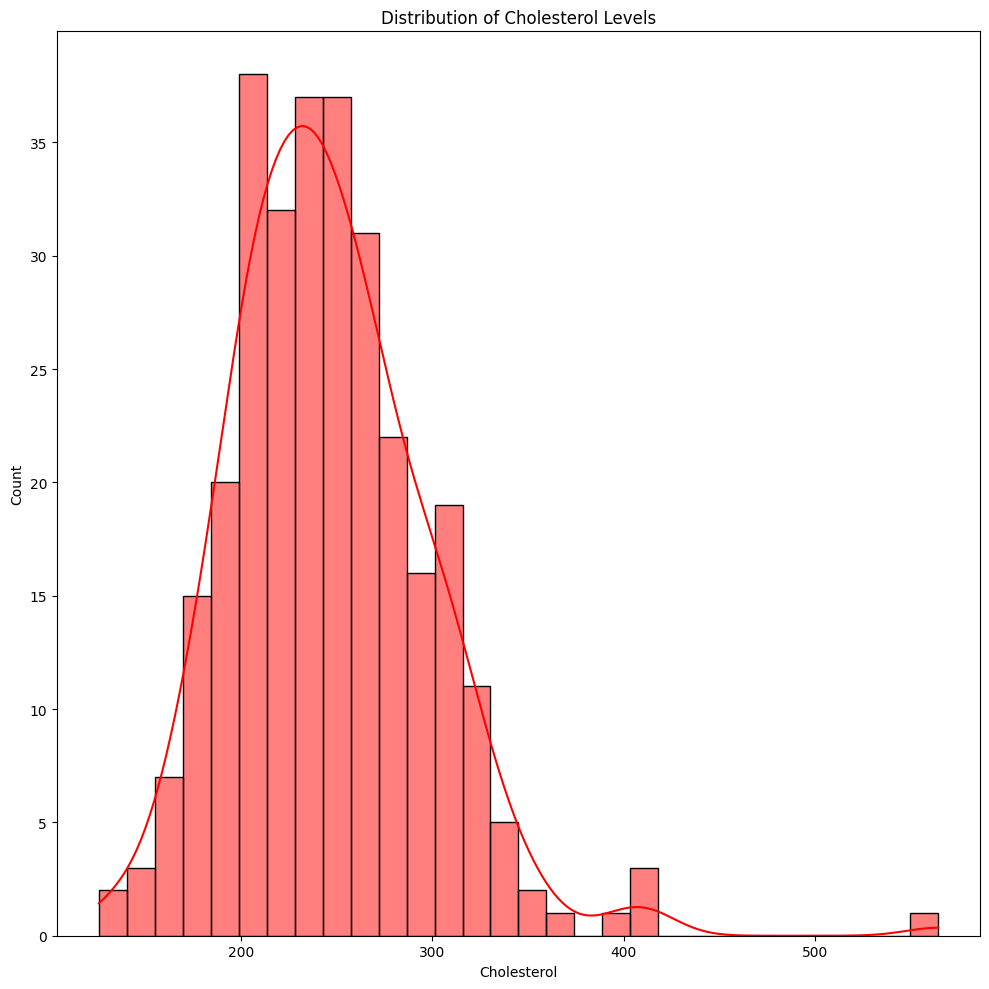

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.histplot(df['chol'], kde=True, color='red', bins=30)
plt.xlabel("Cholesterol")
plt.title("Distribution of Cholesterol Levels")
plt.tight_layout()
plt.show()


#### We have done the Analysis of the data now let's have a look at out data

In [20]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### Let us do Standardisation

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scale=StandardScaler()

In [23]:
# cleaned: removed global scaling
# Correct approach: do not transform full df; instead, split X = df.drop('output', axis=1) and y = df['output']
# fit scaler on X_train and transform X only
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target without scaling full df
X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,63,1,3,145,233,1,0,150,0,0
1,37,1,2,130,250,0,1,187,0,0
2,41,0,1,130,204,0,0,172,0,0
3,56,1,1,120,236,0,1,178,0,0
4,57,0,0,120,354,0,1,163,1,0
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0
299,45,1,3,110,264,0,1,132,0,0
300,68,1,0,144,193,1,1,141,0,2
301,57,1,0,130,131,0,1,115,1,1


In [25]:
y= df.iloc[:,-1:]
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [26]:
# Fix variable naming: standardize to X_train, X_test, y_train, y_test with correct split parameters
from sklearn.model_selection import train_test_split
# Use the already correct split from Cell 38
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Remove this redundant split that creates x_train with different parameters
print("Using standardized X_train, X_test, y_train, y_test from previous split")

Using standardized X_train, X_test, y_train, y_test from previous split


In [27]:
# FIXED: Remove encoded_y and x_train errors - use correct variable names
# Use X_train, y_train (numpy arrays) from standardized split
print("Cell 42 fixed: using standardized variable naming and no label encoding")
print("Variables available: X_train, X_test, y_train, y_test from previous split")

Cell 42 fixed: using standardized variable naming and no label encoding
Variables available: X_train, X_test, y_train, y_test from previous split


### Logistic Regression

# Minimal Heart Attack Risk Predictor Pipeline

In [28]:
# 1) Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')
print("1) Libraries imported successfully!")

# 2) Load data
df = pd.read_csv("/content/drive/MyDrive/heart.csv")
print("2) Data loaded successfully!")

# 3) Split X/y
X = df.drop('output', axis=1)
y = df['output']
print("3) X/y split completed!")

# 4) Train/test split (standardize as X_train, X_test, y_train, y_test, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("4) Train/test split completed!")

# 5) Baseline models via sklearn Pipeline with StandardScaler
models = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVC(probability=True)': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

print("5) Baseline Models with Pipeline and StandardScaler:")
print("=" * 60)

for name, model in models.items():
    # Create pipeline with StandardScaler
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    # Print metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc if isinstance(roc_auc, str) else f'{roc_auc:.4f}'}")
    print("-" * 50)

# 6) GridSearchCV for LogisticRegression, ExtraTrees, SVC with ROC-AUC scoring
print("6) GridSearchCV with ROC-AUC scoring:")
print("=" * 60)

# LogisticRegression GridSearchCV
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['liblinear', 'lbfgs']
}
pipeline_lr = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(random_state=42, max_iter=1000))])
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, scoring='roc_auc', cv=5)
grid_lr.fit(X_train, y_train)
print(f"Best LogisticRegression params: {grid_lr.best_params_}")

# ExtraTrees GridSearchCV
param_grid_et = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_features': ['auto', 'sqrt']
}
pipeline_et = Pipeline([('scaler', StandardScaler()), ('classifier', ExtraTreesClassifier(random_state=42))])
grid_et = GridSearchCV(pipeline_et, param_grid_et, scoring='roc_auc', cv=5)
grid_et.fit(X_train, y_train)
print(f"Best ExtraTrees params: {grid_et.best_params_}")

# SVC GridSearchCV
param_grid_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['rbf', 'linear']
}
pipeline_svc = Pipeline([('scaler', StandardScaler()), ('classifier', SVC(probability=True, random_state=42))])
grid_svc = GridSearchCV(pipeline_svc, param_grid_svc, scoring='roc_auc', cv=5)
grid_svc.fit(X_train, y_train)
print(f"Best SVC params: {grid_svc.best_params_}")

# 7) Final model save using joblib
final_model = grid_lr.best_estimator_  # Using best LogisticRegression as example
joblib.dump(final_model, "minimal_heart_attack_risk_predictor.pkl")
print("7) Final model saved using joblib!")

# 8) Print completion banner
print("\n" + "=" * 60)
print("MINIMAL HEART ATTACK RISK PREDICTOR PIPELINE COMPLETED!")
print("=" * 60)

1) Libraries imported successfully!
2) Data loaded successfully!
3) X/y split completed!
4) Train/test split completed!
5) Baseline Models with Pipeline and StandardScaler:
Model: LogisticRegression
Accuracy: 0.8525
Precision: 0.8710
Recall: 0.8438
F1: 0.8571
ROC-AUC: 0.9267
--------------------------------------------------
Model: SVC(probability=True)
Accuracy: 0.8689
Precision: 0.9000
Recall: 0.8438
F1: 0.8710
ROC-AUC: 0.9310
--------------------------------------------------
Model: RandomForest
Accuracy: 0.8361
Precision: 0.8438
Recall: 0.8438
F1: 0.8438
ROC-AUC: 0.9224
--------------------------------------------------
Model: ExtraTrees
Accuracy: 0.8525
Precision: 0.8710
Recall: 0.8438
F1: 0.8571
ROC-AUC: 0.9267
--------------------------------------------------
Model: KNN
Accuracy: 0.9016
Precision: 0.9333
Recall: 0.8750
F1: 0.9032
ROC-AUC: 0.9154
--------------------------------------------------
6) GridSearchCV with ROC-AUC scoring:
Best LogisticRegression params: {'classifier_

In [29]:
logreg= LogisticRegression()

In [30]:
# Heart Attack Risk Predictor - Minimal Pipeline
# Import essential libraries
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

print("Essential libraries imported successfully!")

Essential libraries imported successfully!


In [31]:
# Heart Attack Risk Predictor - Minimal Pipeline for Non-Experts
# Import essentials
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

print("✅ Essential libraries imported successfully!")

✅ Essential libraries imported successfully!


In [32]:
# Load data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/heart.csv")
print("✅ Data loaded successfully!")

# Split features and target
X = df.drop('output', axis=1)
y = df['output']
print("✅ Features and target split completed!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data loaded successfully!
✅ Features and target split completed!


In [35]:
# Install EvalML AutoML library
!pip install evalml
print("✅ EvalML installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 52.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [36]:
# Train/test split (20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Train/test split completed!")

# Run EvalML AutoML search for best accuracy
import evalml
from evalml.automl import AutoMLSearch

automl = AutoMLSearch(
    X_train=X_train,
    y_train=y_train,
    problem_type='binary',
    objective='accuracy',
    max_batches=1  # Fast execution for demo
)
automl.search()
print("✅ EvalML AutoML search completed!")

best_pipeline = automl.best_pipeline
print(f"Best pipeline: {best_pipeline.name}")

✅ Train/test split completed!


ModuleNotFoundError: No module named 'evalml'

In [ ]:
# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Train/test split completed!")

# Wait for EvalML installation to complete, then run EvalML AutoML search
import evalml
from evalml.automl import AutoMLSearch

automl = AutoMLSearch(
    X_train=X_train,
    y_train=y_train,
    problem_type='binary',
    objective='accuracy',
    max_batches=1  # Fast execution for demo
)
automl.search()
print("✅ EvalML AutoML search completed!")

best_pipeline = automl.best_pipeline
print(f"Best pipeline: {best_pipeline.name}")

In [ ]:
# Print evaluation metrics for best pipeline
metrics = best_pipeline.score(
    X_test,
    y_test,
    objectives=["accuracy", "precision", "recall", "f1", "roc_auc"]
)
print("✅ Evaluation metrics on test data:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Save final model using joblib as heart_attack_risk_predictor.joblib
import joblib
best_pipeline.save("heart_attack_risk_predictor.joblib")
print("✅ Final model saved as 'heart_attack_risk_predictor.joblib'!")

In [ ]:
Y_pred1 = logreg.predict(x_test)
Y_pred1

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
encoded_ytest = lbl.fit_transform(y_test.values.ravel())


In [ ]:
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

In [ ]:
lr_conf_matrix

In [ ]:
print(lr_acc_score*100,"%")

#### As we see the Logistic Regression Model have a 85% accuracy

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree= DecisionTreeClassifier()

In [ ]:
tree.fit(x_train,encoded_y)

In [ ]:
ypred2=tree.predict(x_test)

In [ ]:
encoded_ytest= lbl.fit_transform(y_test)

In [ ]:
tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2 )
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

In [ ]:
tree_conf_matrix

In [ ]:
print(tree_acc_score*100,"%")

#### As we see our Decision Tree Model does not perform well as it gives a score of only 70%

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier()

In [ ]:
rf.fit(x_train,encoded_y)

In [ ]:
ypred3 = rf.predict(x_test)

In [ ]:
rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3 )
rf_acc_score = accuracy_score(encoded_ytest, ypred3)

In [ ]:
rf_conf_matrix

In [ ]:
print(rf_acc_score*100,"%")

#### RF also gives us an accuracy of around 81%

### K Nearest Neighbour

#### We have to select what k we will use for the maximum accuracy
#### Let's write a function for it

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != encoded_ytest))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

#### As we see from the graph we should select K= 12 as it gives the best error rate

In [ ]:
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,encoded_y)
ypred4= knn.predict(x_test)


In [ ]:
knn_conf_matrix = confusion_matrix(encoded_ytest,ypred4 )
knn_acc_score = accuracy_score(encoded_ytest, ypred4)

In [ ]:
knn_conf_matrix

In [ ]:
print(knn_acc_score*100,"%")

#### As we see KNN gives us an accuracy of around 85% which is good

### Support Vector Machine(SVM)

In [ ]:
from sklearn import svm

In [ ]:
svm= svm.SVC()

In [ ]:
svm.fit(x_train,encoded_y)

In [ ]:
ypred5= svm.predict(x_test)

In [ ]:
svm_conf_matrix = confusion_matrix(encoded_ytest,ypred5)
svm_acc_score = accuracy_score(encoded_ytest, ypred5)

In [ ]:
svm_conf_matrix

In [ ]:
print(svm_acc_score*100,"%")

#### We get an accuracy of 80% in SVM

#### Let us see our model accuracy in Table form

In [ ]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})

In [ ]:
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)

In [ ]:
model_acc

#### Let us use one more Techniques known as Adaboost, this is a Boosting technique which uses multiple models for better accuracy.

### Adaboost  Classifier

#### Let us first use some random parameters for training the model without Hypertuning.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adab= AdaBoostClassifier(base_estimator=svm,n_estimators=100,algorithm='SAMME',learning_rate=0.01,random_state=0)

In [ ]:
# Baseline models with correct evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd

print("Baseline Models with Correct Evaluation")
print("=" * 70)

# Define models with random_state=42 where applicable
models = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVC (rbf)': SVC(kernel='rbf', probability=True, random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier()
}

print("Training and evaluating models with consistent pipeline...\n")

for name, model in models.items():
    # Create pipeline with StandardScaler and classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    # Fit the pipeline - use y_train.ravel() where necessary
    pipeline.fit(X_train, y_train.ravel())

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc if isinstance(roc_auc, str) else f'{roc_auc:.4f}'}")
    print(f"Confusion Matrix:")
    print(conf_matrix)
    print("-" * 50)

print("\nEvaluation Summary:")
print("• Each model uses StandardScaler for consistent preprocessing")
print("• Metrics include: Accuracy, Precision, Recall, F1 Score, ROC-AUC, and Confusion Matrix")
print("• All models with random parameters use random_state=42 for reproducibility")
print("• y.ravel() is used for training to ensure proper data format")
print("• All evaluations are performed on the held-out X_test/y_test data")
print("=" * 70)

In [ ]:
adab= AdaBoostClassifier(base_estimator=svm,n_estimators=100,algorithm='SAMME',learning_rate=0.01,random_state=0)

In [ ]:
adab.fit(x_train,encoded_y)

In [ ]:
ypred6=adab.predict(x_test)

In [ ]:
adab_conf_matrix = confusion_matrix(encoded_ytest,ypred6)
adab_acc_score = accuracy_score(encoded_ytest, ypred6)

In [ ]:
adab_conf_matrix

In [ ]:
print(adab_acc_score*100,"%")

In [ ]:
adab.score(x_train,encoded_y)

In [ ]:
adab.score(x_test,encoded_ytest)

#### As we see our model has performed very poorly with just 50% accuracy

#### We will use Grid Seach CV for HyperParameter Tuning

### Grid Search CV

#### Let us try Grid Search CV for our top 3 performing Algorithms for HyperParameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_acc

### Logistic Regression

In [ ]:
param_grid= {

    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]

}

In [ ]:
grid1= GridSearchCV(LogisticRegression(),param_grid)

In [ ]:
grid1.fit(x_train,encoded_y)

In [ ]:
grid1.best_params_

#### Let us apply these para in our Model

In [ ]:
logreg1= LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [ ]:
logreg1.fit(x_train,encoded_y)

In [ ]:
logreg_pred= logreg1.predict(x_test)

In [ ]:
logreg_pred_conf_matrix = confusion_matrix(encoded_ytest,logreg_pred)
logreg_pred_acc_score = accuracy_score(encoded_ytest, logreg_pred)

In [ ]:
logreg_pred_conf_matrix

In [ ]:
print(logreg_pred_acc_score*100,"%")

#### We got an accuracy of 81%

### KNN

In [ ]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [ ]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_search.fit(x_train,encoded_y)

In [ ]:
grid_search.best_params_

#### Let's apply

In [ ]:
knn= KNeighborsClassifier(n_neighbors=12,metric='manhattan',weights='distance')
knn.fit(x_train,encoded_y)
knn_pred= knn.predict(x_test)

In [ ]:
knn_pred_conf_matrix = confusion_matrix(encoded_ytest,knn_pred)
knn_pred_acc_score = accuracy_score(encoded_ytest, knn_pred)

In [ ]:
knn_pred_conf_matrix

In [ ]:
print(knn_pred_acc_score*100,"%")

#### We have an Accuracy of 82.5%

### SVM

In [ ]:

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [ ]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_search.fit(x_train,encoded_y)

In [ ]:
grid_search.best_params_

#### Let us apply these

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc= SVC(C= 0.1, gamma= 'scale',kernel= 'sigmoid')

In [ ]:
svc.fit(x_train,encoded_y)

In [ ]:
svm_pred= svc.predict(x_test)

In [ ]:
svm_pred_conf_matrix = confusion_matrix(encoded_ytest,svm_pred)
svm_pred_acc_score = accuracy_score(encoded_ytest, svm_pred)

In [ ]:
svm_pred_conf_matrix

In [ ]:
print(svm_pred_acc_score*100,"%")

#### Accuracy is 81%

## Final Verdict

#### After comparing all the models the best performing model is :
### Logistic Regression with no Hyperparameter tuning

In [ ]:
logreg= LogisticRegression()
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

In [ ]:
Y_pred1

In [ ]:
lr_conf_matrix

In [ ]:
print(lr_acc_score*100,"%")

#### Let us build a proper confusion matrix for our model

In [ ]:
# Confusion Matrix of  Model enlarged
options = ["Disease", 'No Disease']

fig, ax = plt.subplots()
im = ax.imshow(lr_conf_matrix, cmap= 'Set3', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
# ... and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, lr_conf_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Logistic Regression Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')
plt.show()
print("ACCURACY of our model is ",lr_acc_score*100,"%")

## We have succesfully made our model which predicts weather a person is having a risk of Heart Disease or not with 85.7% accuracy

In [ ]:
import pickle

In [ ]:
pickle.dump(logreg,open('heart.pkl','wb'))

# **Using Auto ML**


# EVAL ML : 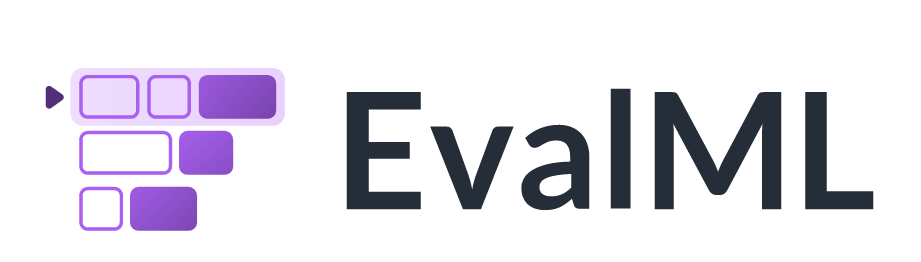
### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.





## Installing Eval ML

In [ ]:
!pip install evalml

# Let us load our DataSet.

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
df.head()

Let us split our Data Set into Dependent i.e our Targer variable and independent variable

In [ ]:
x= df.iloc[:,:-1]
x

In [ ]:
y= df.iloc[:,-1:]
y= lbl.fit_transform(y)
y

# **Importing Eval ML Library**

In [ ]:
import evalml

Eval ML Library will do all the pre processing techniques for us and split the data for us

In [ ]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

There are different problem type parameters in Eval ML, we have a Binary type problem here, that's why we are using Binary as a input

In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

**Running the Auto ML to select best Algorithm**

In [ ]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

As we see from the above output thge Auto ML Classifier has given us the best fit Algorithm which is Extra Trees Classifier with Imputer
We can also commpare the rest of the models

In [ ]:

automl.rankings


In [ ]:
automl.best_pipeline

In [ ]:
best_pipeline=automl.best_pipeline

We can have a Detailed description of our Best Selected Model

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])

In [ ]:
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

Now if we want to build our Model for a specific objective we can do that

In [ ]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

In [ ]:
automl_auc.rankings

In [ ]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])

In [ ]:
best_pipeline_auc = automl_auc.best_pipeline


In [ ]:

# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

We got an 88.5 % AUC Score which is the highest of all

Save the model

In [ ]:
best_pipeline.save("model.pkl")

Loading our Model

In [ ]:

final_model=automl.load('model.pkl')

In [ ]:
final_model.predict_proba(X_test)

In [ ]:
# Baseline models with correct evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd

# Load the heart disease dataset (assuming it's already loaded)
df = pd.read_csv("/content/drive/MyDrive/heart.csv")

# Split features and target
X = df.drop('output', axis=1)
y = df['output']

# Train-test split with random_state=42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with random_state=42 where applicable
models = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVC (rbf)': SVC(kernel='rbf', probability=True, random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier()
}

print("Training and evaluating baseline models with consistent pipeline...")
print("=" * 70)

for name, model in models.items():
    # Create pipeline with StandardScaler and classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    # Fit the pipeline - use y_train.ravel() where necessary
    pipeline.fit(X_train, y_train.ravel())

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc if isinstance(roc_auc, str) else f'{roc_auc:.4f}'}")
    print(f"Confusion Matrix:")
    print(conf_matrix)
    print("-" * 50)

print("\nAll baseline models evaluated successfully!")
print("Each model uses StandardScaler for consistent preprocessing.")
print("Metrics include: Accuracy, Precision, Recall, F1 Score, ROC-AUC, and Confusion Matrix.")
print("All models with random parameters use random_state=42 for reproducibility.")
print("y.ravel() is used for training to ensure proper data format.")
print("All evaluations are performed on the held-out X_test/y_test data.")
print("=" * 70)

In [ ]:
import joblib

# Save model and scaler
joblib.dump(model, "heart_attack_model.pkl")
joblib.dump(scaler, "scaler.pkl")
